In [ ]:
import pandas as pd
import glob
import tensorflow as tf
import matplotlib.pyplot as plt
import os


In [ ]:
data_dir = '/content/drive/My Drive/Face Recognition/dataset/train'


In [ ]:
print("Total Photos :"+str(len(glob.glob(data_dir+"/*/*"))))


Total Photos :450


In [ ]:
classes = os.listdir(data_dir)
print(classes)


['Shraddha Chobhe', 'Rutuja Bhandari', 'Sagarika Verma', 'Shruti Agarwal', 'Shivani Dere', 'Sharvari Deshpande', 'Sayali Badade', 'Rutuja Jagtap', 'Shubham Pagare', 'Unzela Inamdar', 'Renesa Ray', 'Purvika Bajaj', 'Rahul Barman', 'Neha Kulkarni', 'Pratik Kakade', 'Maziya Fatima', 'Aditya Panchwagh', 'Abhishek Saxena', 'Karan Mahajan', 'Aditya Mache']


In [ ]:
# install dlib (will take 10 or more minutes)
!apt update
!apt install -y cmake
!pip install dlib

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:12 http://security.ubuntu.com/ub

In [ ]:
os.makedirs("Faces",exist_ok=True)


In [ ]:
face_db='/content/Faces'


#**CNN-**

In [ ]:
import dlib
import cv2
from PIL import Image
import numpy as np
face_detector = dlib.get_frontal_face_detector()


In [ ]:
for c in classes:
  os.makedirs(face_db+f"/{c}",exist_ok=True)
  i=0
  for f in glob.glob(data_dir+f"/{c}/*"):

    img = Image.open(f).convert('L')
    detected_face = face_detector(np.array(img),1)
    if len(detected_face)==1:
      crop_area = (detected_face[0].left(), detected_face[0].top(), detected_face[0].right(), detected_face[0].bottom())
      cropped_image = img.crop(crop_area)
      
      name = c+str(i)
      cropped_image.save(face_db+f"/{c}/{name}.jpg")
      i=i+1


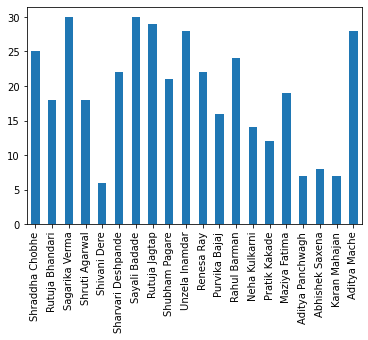

In [ ]:
distribution = {}
for c in classes:
  distribution[c] = len(glob.glob(face_db+f"/{c}/*"))
pd.Series(dict(distribution)).plot(kind='bar')


In [ ]:
dataset = pd.DataFrame()
for c in classes:
    for f in glob.glob(face_db+f"/{c}/*"):
        dataset = dataset.append({"filename":f,"class":c},ignore_index=True)

In [ ]:
dataset

,class,filename
0,Shraddha Chobhe,/content/Faces/Shraddha Chobhe/Shraddha Chobhe...
1,Shraddha Chobhe,/content/Faces/Shraddha Chobhe/Shraddha Chobhe...
2,Shraddha Chobhe,/content/Faces/Shraddha Chobhe/Shraddha Chobhe...
3,Shraddha Chobhe,/content/Faces/Shraddha Chobhe/Shraddha Chobhe...
4,Shraddha Chobhe,/content/Faces/Shraddha Chobhe/Shraddha Chobhe...
...,...,...
379,Aditya Mache,/content/Faces/Aditya Mache/Aditya Mache17.jpg
380,Aditya Mache,/content/Faces/Aditya Mache/Aditya Mache18.jpg
381,Aditya Mache,/content/Faces/Aditya Mache/Aditya Mache26.jpg
382,Aditya Mache,/content/Faces/Aditya Mache/Aditya Mache7.jpg


In [ ]:
test_ratio = 0.2
test_df = dataset.sample(frac=test_ratio,random_state=21)
train_df = dataset.drop(test_df.index, axis=0)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 20 to 6
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   class     77 non-null     object
 1   filename  77 non-null     object
dtypes: object(2)
memory usage: 1.8+ KB


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 383
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   class     307 non-null    object
 1   filename  307 non-null    object
dtypes: object(2)
memory usage: 7.2+ KB


In [ ]:
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
rotation_range=15,
rescale=1./255,
zoom_range=0.2,
)
train_gen = train_data_gen.flow_from_dataframe(dataframe=train_df,xcol='filename',ycol='class',target_size=(128,128),batch_size=15,class_mode='categorical')
valid_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
valid_gen = valid_data_gen.flow_from_dataframe(dataframe=test_df,xcol='filename',ycol='class',target_size=(128,128),batch_size=15,class_mode='categorical',random=False)

Found 307 validated image filenames belonging to 20 classes.
Found 77 validated image filenames belonging to 20 classes.


In [ ]:
train_gen.class_indices

{'Abhishek Saxena': 0,
 'Aditya Mache': 1,
 'Aditya Panchwagh': 2,
 'Karan Mahajan': 3,
 'Maziya Fatima': 4,
 'Neha Kulkarni': 5,
 'Pratik Kakade': 6,
 'Purvika Bajaj': 7,
 'Rahul Barman': 8,
 'Renesa Ray': 9,
 'Rutuja Bhandari': 10,
 'Rutuja Jagtap': 11,
 'Sagarika Verma': 12,
 'Sayali Badade': 13,
 'Sharvari Deshpande': 14,
 'Shivani Dere': 15,
 'Shraddha Chobhe': 16,
 'Shruti Agarwal': 17,
 'Shubham Pagare': 18,
 'Unzela Inamdar': 19}

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax')) 

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 128)      

In [ ]:
history = model.fit(train_gen, epochs=250, validation_data=valid_gen)

Epoch 1/250
21/21 [==============================] - 14s 688ms/step - loss: 1.7791 - accuracy: 0.3941 - val_loss: 2.4988 - val_accuracy: 0.3377
Epoch 2/250
21/21 [==============================] - 11s 538ms/step - loss: 1.7594 - accuracy: 0.4528 - val_loss: 2.5143 - val_accuracy: 0.3766
Epoch 3/250
21/21 [==============================] - 12s 551ms/step - loss: 1.7592 - accuracy: 0.4137 - val_loss: 2.5217 - val_accuracy: 0.2987
Epoch 4/250
21/21 [==============================] - 11s 537ms/step - loss: 1.7374 - accuracy: 0.4528 - val_loss: 2.4734 - val_accuracy: 0.3247
Epoch 5/250
21/21 [==============================] - 12s 553ms/step - loss: 1.6949 - accuracy: 0.4886 - val_loss: 2.5075 - val_accuracy: 0.3766
Epoch 6/250
21/21 [==============================] - 11s 543ms/step - loss: 1.6641 - accuracy: 0.4919 - val_loss: 2.4278 - val_accuracy: 0.3636
Epoch 7/250
21/21 [==============================] - 11s 539ms/step - loss: 1.5650 - accuracy: 0.5114 - val_loss: 2.4964 - val_accuracy:

In [ ]:
model.save("CNN_Face_Recognition.h5")


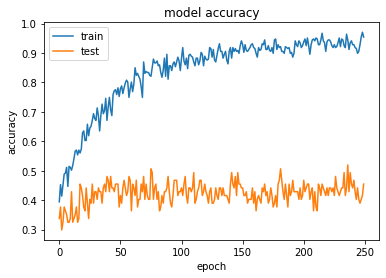

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

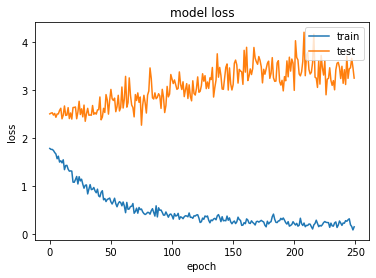

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
model.evaluate(train_gen)


21/21 [==============================] - 4s 183ms/step - loss: 0.2009 - accuracy: 0.9349


[0.2009202241897583, 0.9348534345626831]

In [ ]:
model.evaluate(valid_gen)

6/6 [==============================] - 1s 99ms/step - loss: 3.2428 - accuracy: 0.4545


[3.2427830696105957, 0.4545454680919647]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
pred = model.predict(valid_gen)


In [ ]:
import numpy as np
test_pred = np.argmax(pred, axis=-1)


In [ ]:
result = confusion_matrix(valid_gen.classes, test_pred)
print("Confusion Matrix: ")
print(result)


Confusion Matrix: 
[[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1]
 [0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1]
 [0 0 0 0 1 0 0 1 0 0 0 3 2 0 0 0 0 0 0 3]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 2 0 1 0 0 1 0 0 1 0 2 1]]


In [ ]:
print(classification_report(valid_gen.classes, test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         3
           9       0.12      0.17      0.14         6
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         6
          12       0.22      0.20      0.21        10
          13       0.50      0.40      0.44         5
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         4
          16       0.25      0.20      0.22         5
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential

#**VGG16** 

In [ ]:
vgg16_model =VGG16(weights = 'imagenet', include_top = False)
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(20, activation = 'softmax')(x)
model2 = Model(inputs = vgg16_model.input, outputs = predictions)

for layer in vgg16_model.layers:
  layer.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model2.fit(train_gen, epochs=70, validation_data=valid_gen)

Epoch 1/70
21/21 [==============================] - 64s 3s/step - loss: 2.9595 - accuracy: 0.1010 - val_loss: 2.8526 - val_accuracy: 0.1169
Epoch 2/70
21/21 [==============================] - 62s 3s/step - loss: 2.6425 - accuracy: 0.2313 - val_loss: 2.7188 - val_accuracy: 0.1948
Epoch 3/70
21/21 [==============================] - 62s 3s/step - loss: 2.4168 - accuracy: 0.2997 - val_loss: 2.5412 - val_accuracy: 0.2727
Epoch 4/70
21/21 [==============================] - 62s 3s/step - loss: 2.2001 - accuracy: 0.4072 - val_loss: 2.3766 - val_accuracy: 0.4545
Epoch 5/70
21/21 [==============================] - 62s 3s/step - loss: 1.9956 - accuracy: 0.4625 - val_loss: 2.3612 - val_accuracy: 0.3377
Epoch 6/70
21/21 [==============================] - 62s 3s/step - loss: 1.8598 - accuracy: 0.4691 - val_loss: 2.1243 - val_accuracy: 0.5195
Epoch 7/70
21/21 [==============================] - 62s 3s/step - loss: 1.7229 - accuracy: 0.5309 - val_loss: 2.1013 - val_accuracy: 0.4675
Epoch 8/70
21/21 [==

In [ ]:
model.evaluate(train_gen)

21/21 [==============================] - 4s 182ms/step - loss: 0.1526 - accuracy: 0.9479


[0.15264791250228882, 0.9478827118873596]

In [ ]:
score=model.evaluate(valid_gen)

6/6 [==============================] - 1s 102ms/step - loss: 3.2428 - accuracy: 0.4545


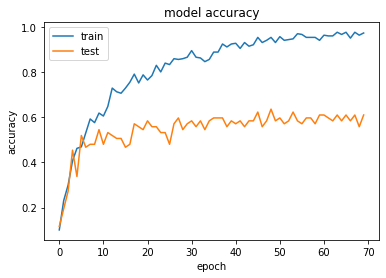

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

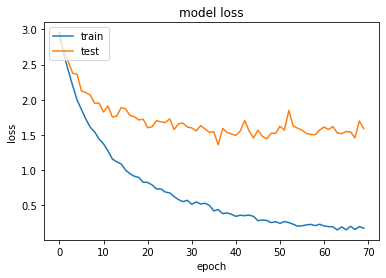

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**CONCLUSION-**

Sucessfully detected facesof friends by using VGG16 pretrained model and CNN model..